Short Sale:
Coefficients:  [[-1.42702820e+00 -1.01666785e+04  1.74747302e+04  1.90715333e+02
   1.21130796e+03 -6.60254234e+03 -6.45605207e+04  6.66851547e+05
  -6.30285310e+04 -1.44454582e+05 -5.49446230e+04 -1.55715483e+05
   4.34650686e+05 -6.98660100e+04 -5.81231323e+04 -4.06012888e+04
   0.00000000e+00 -6.68177538e+04 -8.15541036e+04 -5.16445752e+04
  -1.67850673e+04  5.82076609e-11 -4.40521139e+04 -3.00365265e+04
  -6.47652052e+04 -6.62685130e+04 -2.79659007e+04 -6.11380000e+04
  -8.25262789e+04  1.78555691e+05 -2.61517520e+04 -2.45542187e+03]]
Score:  0.8977705335657828
Intercept:  [35056.12222836]
Mean Square Error:  6854244978.048077
Foreclosure:
Coefficients:  [[-1.88759658e+00 -2.66905987e+03  1.73549652e+04  2.01361382e+02
   1.57499913e+03  3.98868061e+03  9.06781089e+03 -1.67748517e+05
   9.72743527e+01 -1.01295457e+04 -7.83851027e+03 -1.33182654e+04
   1.01863407e-10  1.45519152e-11  5.10537577e+04  1.90086038e+04
   4.44283378e+03 -1.76815512e+04  2.63815661e+04  7.1839

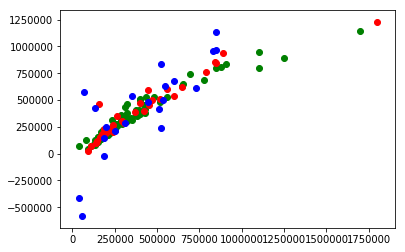

Regular:
Coefficients:  [[ 4.59394094e+02 -4.52228251e+04  1.38745856e+04  4.77690035e+02
   2.91366642e+03  1.06772128e+05  7.04610420e+04 -2.38298493e+05
  -1.68516281e+05 -2.23569769e+05  5.05094008e+04 -8.43224354e+04
   5.47414380e+05  1.05295692e+05 -3.77939949e+04  2.51963081e+05
  -1.41718072e+06 -1.88560941e+05  1.30405108e+05 -6.71818285e+04
  -5.39962514e+04 -7.10632418e+04  2.04186853e+05  3.12843745e+05
   1.45519152e-11  3.57729371e+05  4.12903160e+05]]
Score:  0.919034127048096
Intercept:  [-72086162.63737118]
Mean Square Error:  64911744264.61905


In [4]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn import preprocessing

data = pd.read_csv('RealEstate.csv')

data1 = data.loc[data['Status'] == 'Short Sale',:]
data1 = data1.loc[:, data1.columns != 'Status']
data1 = pd.get_dummies(data1)

data2 = data.loc[data['Status'] == 'Foreclosure',:]
data2 = data2.loc[:, data2.columns != 'Status']
data2 = pd.get_dummies(data2)

data3 = data.loc[data['Status'] == 'Regular',:]
data3 = data3.loc[:,data3.columns != 'Status']
data3 = pd.get_dummies(data3)

x_data1 = data1.loc[:, data1.columns != 'Price' ]
y_data1 = data1.loc[:, data1.columns == 'Price']
x_train1, x_test1, y_train1, y_test1 = train_test_split(x_data1, y_data1, test_size = 0.2, random_state = 100, shuffle = True)

x_data2 = data2.loc[:, data2.columns != 'Price' ]
y_data2 = data2.loc[:, data2.columns == 'Price']
x_train2, x_test2, y_train2, y_test2 = train_test_split(x_data2, y_data2, test_size = 0.2, random_state = 100, shuffle = True)

x_data3 = data3.loc[:, data3.columns != 'Price' ]
y_data3 = data3.loc[:, data3.columns == 'Price']
x_train3, x_test3, y_train3, y_test3 = train_test_split(x_data3, y_data3, test_size = 0.2, random_state = 100, shuffle = True)

reg = LinearRegression()
reg.fit(x_train1, y_train1)
y_test_predict1 = reg.predict(x_test1).round()
plt.scatter(y_test1, y_test_predict1, c = 'green')
print("Short Sale:")
print("Coefficients: " , reg.coef_)
print("Score: ", reg.score(x_train1, y_train1))
print("Intercept: ", reg.intercept_)
print("Mean Square Error: ", mean_squared_error(y_test1, y_test_predict1))

reg.fit(x_train2, y_train2)
y_test_predict2 = reg.predict(x_test2).round()
plt.scatter(y_test2, y_test_predict2, c = 'red')
print("Foreclosure:")
print("Coefficients: " , reg.coef_)
print("Score: ", reg.score(x_train2, y_train2))
print("Intercept: ", reg.intercept_)
print("Mean Square Error: ", mean_squared_error(y_test2, y_test_predict2))

reg.fit(x_train3, y_train3)
y_test_predict3 = reg.predict(x_test3).round()
plt.scatter(y_test3, y_test_predict3, c = 'blue')
plt.show()
print("Regular:")
print("Coefficients: " , reg.coef_)
print("Score: ", reg.score(x_train3, y_train3))
print("Intercept: ", reg.intercept_)
print("Mean Square Error: ", mean_squared_error(y_test3, y_test_predict3))
